### CS102/CS103

Prof. Götz Pfeiffer<br />
School of Mathematics, Statistics and Applied Mathematics<br />
NUI Galway

# Lecture 19: Hamilton's Quaternions

<p style="text-align: right;">
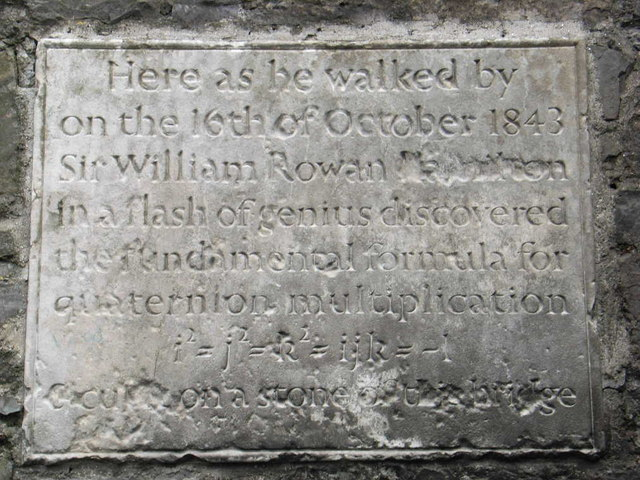

Image by JP, <a href="https://creativecommons.org/licenses/by-sa/2.0" title="Creative Commons Attribution-Share Alike 2.0">CC BY-SA 2.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=12546726">Link</a>
</p>

The [quaternions](https://en.wikipedia.org/wiki/Quaternion) form a number system that extends the
more common system of complex numbers by a further two real dimensions. The were discovered on Monday, October 16, 1843
by the Irish mathematician [William Rowen Hamilton](https://en.wikipedia.org/wiki/William_Rowan_Hamilton),
while walking with his wife along the Royal Canal in Dublin, on his way to a meeting of the Royal Irish Academy ...

Quaternions have many applications to **physics** and **geometry**.  More recently, quaternions are used in **computer graphics**, for programming 3D games and animated movies. 

Here, we will use quaternions as a further example of classes and objects, in particular as **objects that behave
like numbers**.  This gives us opportunities to review known and to see a few more new **useful features of lists and functions** in `python`.

## Representing Quaternions

Quaternions are expressed in a similar manner as complex numbers, except that there are **three imaginary units**
$i$, $j$, and $k$ (instead of just $i$).  A typical quaternion thus has **four real coefficients**, $a$, $b$, $c$, and $d$, say, and is written as
$$ a + b\,i +c\,j + d\,k.$$
So we can write a first version of a `Quaternion` class, that can construct `Quaternion` instances
and print them nicely as strings.  The coefficients $a, b, c, d$ are to be stored
as a list (or vector) in an **instance variable** `coeffs`.

In [1]:
class Quaternion:
    "Hamilton's quaternions"
    
    def __init__(self, coeffs):
        "quaternion constructor"
        self.coeffs = coeffs

    def __repr__(self):
        "string representation"
        return "{} + {}i + {}j + {}k".format(self.coeffs[0], self.coeffs[1], self.coeffs[2], self.coeffs[3])

Now we can create `Quaternion` instances and look at their string representations

In [2]:
q = Quaternion([1, 2, 3, 4])
q

1 + 2i + 3j + 4k

In [3]:
q.coeffs

[1, 2, 3, 4]

But, wouldn't it be nice if we could 

1. leave out the square brackets (`[ ]`) around the coefficient list in the constructor call
`Quaternion([1, 2, 3, 4])`?

2. avoid the repetition `self.coeffs[0], self.coeffs[1], ...` in the string formatting?

We can indeed ...

## Arbitrary Argument Lists

Functions in `python` can be defined so that they take an arbitrary number of arguments.
For this, the **last parameter** in the function definition has to be marked with an 
asterisk (`*`).  If the function is called, after matching arguments up with the other
parameters, all remaining arguments will be assigned to that parameter, as a tuple.

In [4]:
class Quaternion:
    "Hamilton's quaternions"

    def __init__(self, *coeffs):
        "quaternion constructor"
        self.coeffs = coeffs

    def __repr__(self):
        "string representation"
        return "{} + {}i + {}j + {}k".format(self.coeffs[0], self.coeffs[1], self.coeffs[2], self.coeffs[3])

Adjusting the class definition accordingly, allows us to now enter quaternion instances with
one less pair of brackets.

In [5]:
q = Quaternion(1, 2, 3, 4)
q

1 + 2i + 3j + 4k

In [6]:
q.coeffs

(1, 2, 3, 4)

##  Unpacking Argument Lists.

The repetition in the string formatting expression is the opposite of the previous problem: Here,
the arguments needed for the `format()` call are the individual coefficients, and `self.coeffs`
as a list has a pair of brackets too many!  Again, the `*`-operator can be used, this time
too unpack a given list (or tuple) into its individual items:  using `format(self.coeffs)`
instead of the old, explicit form.

In [7]:
class Quaternion:
    "Hamilton's quaternions"

    def __init__(self, *coeffs):
        "quaternion constructor"
        self.coeffs = coeffs

    def __repr__(self):
        "string representation"
        return "{} + {}i + {}j + {}k".format(*self.coeffs)

In [8]:
q = Quaternion(1, 2, 3, 4)
q

1 + 2i + 3j + 4k

## Adding  and Subtracting Quaternions

Back to the quaternions.  The **negative** of a quaternion has as its coefficients the negatives
of the original coefficients.  If $w = a + b\,i + c\,j + d\,k$, then
$$-w = -a -b\,i -c\,j -d\,k.$$
This can be implemented as the **special method** `__neg__()`, as follows.

In [9]:
class Quaternion:
    "Hamilton's quaternions"

    def __init__(self, *coeffs):
        "quaternion constructor"
        self.coeffs = coeffs

    def __repr__(self):
        "string representation"
        return "{} + {}i + {}j + {}k".format(*self.coeffs)
    
    def __neg__(self):
        "-self"
        return Quaternion(-self.coeffs[0], -self.coeffs[1], -self.coeffs[2], -self.coeffs[3])

In [10]:
q = Quaternion(1,2 , 3, 4)
-q

-1 + -2i + -3j + -4k

Ok, this could be printed with a bit more care, but it's not wrong! 
More worrying is the repetition in forming the negatives of all four coefficients.
This will most likely happen again ...

**Sums** of quaternions are formed by simply adding corresponding coefficients.
That is the sum of $z = a_1 + b_1 i + c_1 j + d_1 k$ and $w = a_2 + b_2 i + c_2 j + d_2 k$ is the
quaternion
$$
z + w = (a_1 + a_2) + (b_1 + b_2) i + (c_1 + c_2) j + (d_1 + d_2) k.
$$ 

In [11]:
class Quaternion:
    "Hamilton's quaternions"

    def __init__(self, *coeffs):
        "quaternion constructor"
        self.coeffs = coeffs

    def __repr__(self):
        "string representation"
        return "{} + {}i + {}j + {}k".format(*self.coeffs)
    
    def __neg__(self):
        "-self"
        return Quaternion(-self.coeffs[0], -self.coeffs[1], -self.coeffs[2], -self.coeffs[3])   
    
    def __add__(self, other):
        "self + other"
        return Quaternion(self.coeffs[0] + other.coeffs[0],
                          self.coeffs[1] + other.coeffs[1],
                          self.coeffs[2] + other.coeffs[2],
                          self.coeffs[3] + other.coeffs[3])
    
    def __sub__(self, other):
        "self - other"
        return self + -other

In [12]:
q = Quaternion(1, 2, 3, 4)
w = Quaternion(1, 1, 1, 1)
q + w

2 + 3i + 4j + 5k

In [13]:
q - w

0 + 1i + 2j + 3k

We get **differences** of quaternions as before, as combination of negation and addition.  But the code 
for `__add__()` is again very repetitive (hence error-prone).  Wouldn't it be nice, if we could use 
a loop to make all these sums from a single recipe ...

## List Comprehension

In mathematics, sets (or sequences) can be described in **set builder notation**,
by the **form**, or by the **properties** of the items in the set. For example,
$$
S = \{ x^2 \mid x = 0, \dots, 9\} 
$$
is the set of squares of the numbers $0$ to $9$. In `python`, using a similar notation,
this set can be obtained as

In [14]:
[x**2 for x in range(10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In the same way, the negatives of the coefficients of the quaternion `q` can be obtained as


In [15]:
[-x for x in q.coeffs]

[-1, -2, -3, -4]

And the sums of corresponding coefficients of `q` and `w` as

In [16]:
[q.coeffs[i] + w.coeffs[i] for i in range(4)]

[2, 3, 4, 5]

Or, using the built-in `zip()` function, which returns a list of corresponding items in the given lists,  even as

In [17]:
[x + y for x, y in zip(q.coeffs, w.coeffs)]

[2, 3, 4, 5]

In [18]:
list(zip(q.coeffs, w.coeffs))

[(1, 1), (2, 1), (3, 1), (4, 1)]

The class definition can be adjusted accordingly, and the gained space can be used
to check the type of the `other` argument, and to raise a `TypeError` in case it is not 
a quaternion instance.

In [19]:
class Quaternion:
    "Hamilton's quaternions"

    def __init__(self, *coeffs):
        "quaternion constructor"
        self.coeffs = coeffs

    def __repr__(self):
        "string representation"
        return "{} + {}i + {}j + {}k".format(*self.coeffs)
    
    def __neg__(self):
        "-self"
        return Quaternion(*[-x for x in self.coeffs])   
    
    def __add__(self, other):
        "self + other"
        if not isinstance(other, type(self)):
            raise TypeError("type mismatch: {} + {}"
                        .format(*[type(x).__name__ for x in [self, other]]))
        return Quaternion(*[x + y for x, y in zip(self.coeffs, other.coeffs)])
    
    def __sub__(self, other):
        "self - other"
        return self + -other

In [20]:
q = Quaternion(1, 2, 3, 4)
w = Quaternion(1, 1, 1, 1)
q + w

2 + 3i + 4j + 5k

## Multiplying Quaternions

The **product** of two quaternions $z = a_0 + a_1 i + a_2 j + a_3 k$ and $w = b_1 + b_2 i + b_3 j + b_4 k$ is determined by the rules
$$i^2 = j^2 = k^2 = ijk = -1$$
(the ones that Hamilton at the time could not resist carving into the stone of Brougham Bridge ...)

From these, one gets the following multiplication table.

|$1$|$i$|$j$|$k$|
:--|:-:|:-:|:-:|:-:|
$1$|$1$|$i$|$j$|$k$|
$i$|$i$|$-1$|$k$|$-j$|
$j$|$j$|$-k$|$-1$|$i$|
$k$|$k$|$j$|$-i$|$-1$|

(Note that this multiplication is **not commutative**: $ij = k$, but $ji = -k$.)

From this table, it follows that $zw = c_0 + c_1 i + c_2 j + c_3 k$, with coefficients
$$
c_0 = a_0 b_0 - a_1 b_1 - a_2 b_2 - a_3 b_3, \\
c_1 = a_0 b_1 + a_1 b_0 + a_2 b_3 - a_3 b_2, \\
c_2 = a_0 b_2 - a_1 b_3 + a_2 b_0 + a_3 b_1, \\
c_3 = a_0 b_3 + a_1 b_2 - a_2 b_2 + a_3 b_0
$$

In order to use these formulas it might help to have the units $1$, $i$, $j$, and $k$ as `Quaternion` instances, i.e.,
```python
        o = Quaternion(1, 0, 0, 0)
        i = Quaternion(0, 1, 0, 0)
        j = Quaternion(0, 0, 1, 0)
        k = Quaternion(0, 0, 0, 1)
```
and to be able to multiply a `Quaternion` instance **from the right** with a number, so that one can
write 
```python
a * o + b * i + c * j + d * k 
```
in the program.  This can actually be implemented with the **special method** `__rmul__()`.

In [21]:
class Quaternion:
    "Hamilton's quaternions"

    def __init__(self, *coeffs):
        "quaternion constructor"
        self.coeffs = coeffs

    def __repr__(self):
        "string representation"
        return "{} + {}i + {}j + {}k".format(*self.coeffs)
    
    def __neg__(self):
        "-self"
        return Quaternion(*[-x for x in self.coeffs])   
    
    def __add__(self, other):
        "self + other"
        if not isinstance(other, type(self)):
            raise TypeError("type mismatch: {} + {}"
                        .format(*[type(x).__name__ for x in [self, other]]))
        return Quaternion(*[x + y for x, y in zip(self.coeffs, other.coeffs)])
    
    def __sub__(self, other):
        "self - other"
        return self + -other
    
    def __mul__(self, other):
        "self * other"
        if not isinstance(other, type(self)):
            raise TypeError("type mismatch: {} * {}"
                        .format(*[type(x).__name__ for x in [self, other]]))

        a, b = self.coeffs, other.coeffs
        return Quaternion(
            a[0]*b[0] - a[1]*b[1] - a[2]*b[2] - a[3]*b[3],
            a[0]*b[1] + a[1]*b[0] + a[2]*b[3] - a[3]*b[2],
            a[0]*b[2] - a[1]*b[3] + a[2]*b[0] + a[3]*b[1],
            a[0]*b[3] + a[1]*b[2] - a[2]*b[1] + a[3]*b[0]
        )

In [22]:
q, w = Quaternion(1, 2, 3, 4), Quaternion(1, 1, 1, 1)
q * w

-8 + 2i + 6j + 4k

In [23]:
w * q

-8 + 4i + 2j + 6k

## Conjugate, Norm, Inverse, Equality

Like a complex number, a quaternion has a conjugate.  The **conjugate** of the quaternion $q = a + b\,i + c\,j + d\,k$ is the quaternion
$$
q^* = a - b\,i - c\,j - d\,k
$$
```python
def conjugate(self):
    "self^*"
    return Quaternion(self.coeffs[0], *[-x for x in self.coeffs[1:]])
```

The **norm** of the quaternion $q = a + b\,i + c\,j + d\,k$ is the real number
$$\|q\| = \sqrt{a^2 + b^2 + c^2 + d^2}.$$
```python
from math import sqrt

def norm(self):
    return sqrt(sum(x ** 2 for x in self.coeffs))

```

The norm has the property
$$\|q\|^2 = q q*.$$
Hence, the **inverse** of a quaternion $q$ is the quaternion 
$$q^{-1} = \|q\|^{-2} q^*.$$
```python
def norm_squared(self):
    return sum(x ** 2 for x in self.coeffs)

def inverse(self):
    return 1 / self.norm_squared() * self.conjugate()
```

Two quaternions are **equal**, if they have the same coefficients.
```python
def __eq__(self, other):
    "self == other"
    if not isinstance(other, type(self)):
        return False
    for x, y in zip(self.coeff, other.coeff):
        if x != y:
            return False
    return True
```
We can use this, for example, to verify the **identity**
$$
q^* = -\frac12 (q + iqi + jqj + kqk)
$$

In [24]:
from quaternion import *

o = Quaternion(1, 0, 0, 0)
i = Quaternion(0, 1, 0, 0)
j = Quaternion(0, 0, 1, 0)
k = Quaternion(0, 0, 0, 1)
q = o + 2*i + 3*j + 4*k
w = Quaternion(1, 1, 1, 1)

In [25]:
q

1 + 2i + 3j + 4k

## Summary: Objects, Lists and Functions

* Objects can behave like numbers, when addition and multiplication is implemented as **special functions**.

* In particular, the special function `__rmul__()` implements **right multiplication** of an instance with
a scalar.

* Attempting to add or multiply instances of **incompatible classes** normally raises a `TypeError`
(as opposed to simply printing a message).

* A `python` function can be defined to take an **arbitrary number of arguments**; for this, the last formal parameter in the function definition is marked with an **asterisk** (`*`).

* Conversely, an asterisk before a list valued argument in a function call **unpacks the list** into individual items.

* The built-in `zip()` function takes lists as arguments and returns a list of lists (or tuples)
of corresponding list items.

* **List comprehension** uses a **generator expression** to build a list of items of a particular form.